<a href="https://colab.research.google.com/github/sid-betalol/HS4007-Computational-Economics-And-Public-Policy/blob/main/povery_paradox_welfare_schemes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HS4007: COMPUTATIONAL ECONOMICS AND PUBLIC POLICY**
### **Group-7 Course Project: Poverty Paradox**

Siddharth Betala (BE19B032), Bharath S (AE19B009), Mishma (ED19B019)

### **Goal**
One way governments across the world try to uplift marginalised sections of the population is through welfare schemes in the form of monetary aid. We wanted to look at whether the binary welfare scheme, for which the eligibility is a threshold based on the periodic income of an agent, can succesfully achieve the goal of alleviating poverty in the long run.

Ideally, such a scheme should generate high welfare and high average savings and at the same time, minimise government spending.

In this project, we look at three schemes and compare them based on the aforementioned parameters.

The three schemes are described as follows:
- **Binary or Vanilla Welfare Scheme:** Under this scheme, the government sets a certain income threshold for the agents to be elgible for aid. The aid is discontinued once an agent's periodic income crosses the threshold.
- **Perpetual Welfare Scheme:**: Under this scheme, every agent in the population is eligible for the aid, irrespective of their periodic income. By modelling this scheme, we aim to evaluate the uitlity of Universal Basic Income in mitigating poverty.
-**Diminishing Aid:** Unlike the Binary Welfare Scheme, when an agent crosses the income threshold, the aid is not discontinued; rather it is cut down by a specific fraction every period.
- Additionally, we look at the situation with **no welfare schemes** in place as our baseline.

### Importing the required libraries

In [ ]:
import math
import pandas as pd
import numpy
import random
import matplotlib.pyplot as plt

## Assumptions
- There are surplus jobs in th economy over all periods, and all agents have uniform access to the job market.
- The government has the monetary capacity to implement each scheme.

## **Defining pertinent terms**
The ultimate goal of such schemes is to ensure that eventually everyone has a job. In a market with surplus jobs, the factors that decide whether or not someone gets a job are twofold:

1.   The first one is the inherent propensity of an agent to be employed, which we define as their **preference**. The preference of an individual is given by a preference function, which has been defined later in the notebook.
2. The second is the **desperation** of agents to be employed, which is determined by their economic conditions.

While the government can't control the preference parameter, it can control the desperation through various schemes.

Hence, in our model we have defined the preference of each agent based on the preference function defined later and the desperation introduced in the population with each of the 4 welfare schemes.

### **Variables Table**
|Name|Description|
|:---:|:---:|
|NUM_PEOPLE| Number of agents in the population|
|NUM_PERIOD| Number of periods for which the model is simulated|
|senti| List containing the preference values for each agent in the population|
|desp| desperation value in the population for a particular scheme|
|wp| aid received by an agent in each period|
|pc| periodic expenses of an agent when they are under the welfare scheme|
|sal| periodic salary of an employed agent at the beginning of the simulation|
|lc| periodic expenses of an employed agent|
|ip| periodic savings/earnings of an agent under the welfare programme; defined as (wp-pc)|
|np| periodic savings/earnings of an employed agent at the beginning of the simulation, defined as (sal-lc)|
|inc| (inc-1) gives the percentage of periodic increment in savings after each period|
|job_status| depicts the eployment status of ana gent in the population|
|govt_spending| money spent by the government under each scheme|
|avg_profit_per_person_per_period| average periodic savings of an agent under a scheme|
|welfare| quantification of the abstract socio-economic welfare created thopugh each scheme|

#### **How have these variables been initialised?**
- The salary of an agent (sal) has been given a higher value than the aid received (wp) each period; this is the expected sitation.
- The periodic expenses of a person under the welfare scheme (pc) have been given a lower value than that of an employed person (lc), because of additional expenses which might be incurrred in terms of transporation to workplace or money spent on meals eaten outside.
- The aforementioned values have been set such that the savings under welfare (ip) are more than savings with a job at the beginning of the simulation(np). This has been deliberately done to see how agents with more short-term rationale act against agents with more preference for jobs. Some reasons for having high preference might be social pressure or ambition.
- We'll be describing the desperation (desp) values for each scheme as we go ahead.  This has been defined for each situation based on how appealing having a job is and how dire is a person's situation will be if they don't have a job given a welfare scheme.


### Initialisation

In [ ]:
NUM_PEOPLE = 100
NUM_PERIOD = 20
job_data = [[],[],[],[]]
welfare = [[],[],[],[]]
spending =  [[],[],[],[]]
avg_income =  [[],[],[],[]]

### Sentiment/Preference Function
Here, the preference function has been defined in a way such that the preference values are in accordance with the (Income-Expenditure) scenarios used ahead

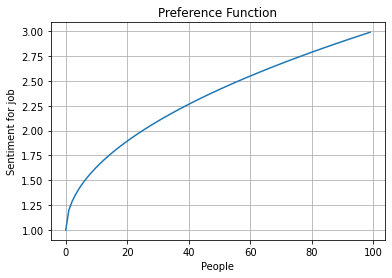

In [ ]:
def senti_func(x : int):
    return math.sqrt(x)/5 + 1

people = list(range(NUM_PEOPLE))
senti = list(senti_func(x) for x in people)
plt.plot(people, senti)
plt.grid()
plt.title('Preference Function')
plt.ylabel('Sentiment for job')
plt.xlabel('People')
plt.show()

## **Model Description**
- We start off with a fixed number of agents in the poulation (NUM_PEOPLE), all of them below the poverty line.
- They will then go search for jobs, if the product of their savings after employment and preference supercede their savings when they are unemployed. They will find a job with a probability p = (desperation * preference)
- We keep a track of the the number of people employed after each period for all schemes, the governnment spending and welfare achieved.  

### **Binary/Vanilla Welfare Scheme**
Desperation is low in the vanilla scheme as people just above the threshold, although have an increased income also have increased expenditure due to travel and food costs associated with employment. Hence they might be better off not working.

$ desp = 0.1 $

In [ ]:
sal = 600
lc = 575

wp = 500
pc = 450

inc = 1.05

desp = 0.1

ip = wp - pc
np = sal - lc

job_status = [False for person in range(NUM_PEOPLE)]
earnings = [[0 for period in range(NUM_PERIOD)] for person in range(NUM_PEOPLE)]
govt_spending = 0


for period in range(NUM_PERIOD):
    for person in range(NUM_PEOPLE):
        if job_status[person] == False:
            p = random.random()
            if (p <= 0.1 * senti[person]) and (np * senti[person] > ip):
                job_status[person] = True
                earnings[person][period] += np
            else:
                earnings[person][period] += ip
                govt_spending += wp
        else:
            earnings[person][period] += earnings[person][period-1] * inc
    job_data[0].append(100-sum(job_status))

avg_profit_per_person_per_period = round(sum([sum(earnings[person])/NUM_PERIOD for person in range(NUM_PEOPLE)])/NUM_PEOPLE)
happiness = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
welfare[0] = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
spending[0] = govt_spending
avg_income[0] = avg_profit_per_person_per_period

wf = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
columns = ["Government spending", 'Number of employed agents', 'Social welfare', 'Average Periodic Earning']
keys = [govt_spending,job_status.count(True),wf,avg_profit_per_person_per_period]
df1 = pd.DataFrame(keys).T
df1.columns = columns
df1

,Government spending,Number of employed agents,Social welfare,Average Periodic Earning
0,372500,73,1789,43


### **No Welfare Scheme**
Desperation is highest in no welfare because people have no source of income and must find employment to sustain their families.

$ desp = 0.3 $

In [ ]:
sal = 600
lc = 575

wp = 0
pc = 450

inc = 1.05
desp = 0.3

ip = wp - pc
np = sal - lc

job_status = [False for person in range(NUM_PEOPLE)]
earnings = [[0 for period in range(NUM_PERIOD)] for person in range(NUM_PEOPLE)]
govt_spending = 0


for period in range(NUM_PERIOD):
    for person in range(NUM_PEOPLE):
        if job_status[person] == False:
            p = random.random()
            if (p <= 0.3 * senti[person]) and (np * senti[person] > ip):
                job_status[person] = True
                earnings[person][period] += np
            else:
                earnings[person][period] += ip
                govt_spending += wp
        else:
            earnings[person][period] += earnings[person][period-1] * inc
    job_data[1].append(100-sum(job_status))


avg_profit_per_person_per_period = round(sum([sum(earnings[person])/NUM_PERIOD for person in range(NUM_PEOPLE)])/NUM_PEOPLE)
welfare[1] = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
spending[1] = govt_spending
avg_income[1] = avg_profit_per_person_per_period

wf = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
columns = ["Government spending", 'Number of employed agents', 'Social welfare', 'Average Periodic Earning']
keys = [govt_spending,job_status.count(True),wf,avg_profit_per_person_per_period]
df2 = pd.DataFrame(keys).T
df2.columns = columns
df2

,Government spending,Number of employed agents,Social welfare,Average Periodic Earning
0,0,100,2900,29


### **Perpetual Welfare Scheme**
Desperation is higher in the perpetual scheme because their incomes would drastically increase once they find a job as they would continue to receive monetary aid.

$ desp = 0.2 $

In [ ]:

sal = 600
lc = 575

wp = 500
pc = 450

desp = 0.2
inc = 1.05

ip = wp - pc
np = sal - lc

job_status = [False for person in range(NUM_PEOPLE)]
earnings = [[0 for period in range(NUM_PERIOD)] for person in range(NUM_PEOPLE)]
govt_spending = 0


for period in range(NUM_PERIOD):
    for person in range(NUM_PEOPLE):
        if job_status[person] == False:
            p = random.random()
            # if (p <= 0.2 * senti[person]) and (np * senti[person] > ip):
            if (p <= 0.2 * senti[person] and ((np + wp)* senti[person] > ip)):
                job_status[person] = True
                earnings[person][period] += np + wp
                govt_spending += wp
            else:
                earnings[person][period] += ip
                govt_spending += wp
        else:
            earnings[person][period] += ((earnings[person][period-1]-wp) * inc) + wp
            govt_spending += wp
    job_data[2].append(100-sum(job_status))

avg_profit_per_person_per_period = round(sum([sum(earnings[person])/NUM_PERIOD for person in range(NUM_PEOPLE)])/NUM_PEOPLE)
happiness = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
welfare[2] = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
spending[2] = govt_spending
avg_income[2] = avg_profit_per_person_per_period
wf = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
columns = ["Government spending", 'Number of employed agents', 'Social welfare', 'Average Periodic Earning']
keys = [govt_spending,job_status.count(True),wf,avg_profit_per_person_per_period]
df3 = pd.DataFrame(keys).T
df3.columns = columns
df3

,Government spending,Number of employed agents,Social welfare,Average Periodic Earning
0,1000000,100,51900,519


### **Diminishing Welfare Scheme**
Desperation in diminishing is 0.15 because finding a job will still dramatically increase their income, albeit the aid would reduce over time. Therefore agents here are not as incentivised as the agents in the perceptual scheme

$ desp = 0.15 $

In [ ]:
sal = 600
lc = 575

wp = 500
pc = 450

inc = 1.05
desp = 0.15

ip = wp - pc
np = sal - lc

job_status = [False for person in range(NUM_PEOPLE)]
earnings = [[0 for period in range(NUM_PERIOD)] for person in range(NUM_PEOPLE)]
wp_comp = [[0 for period in range(NUM_PERIOD)] for person in range(NUM_PEOPLE)]
govt_spending = 0

wp_dec = 0.9


for period in range(NUM_PERIOD):
    for person in range(NUM_PEOPLE):
        if job_status[person] == False:
            p = random.random()
            if (p <= 0.15 * senti[person]) :
                job_status[person] = True
                wp_comp[person][period] = wp
                earnings[person][period] += np + wp_comp[person][period]
                govt_spending += wp_comp[person][period]
            else:
                earnings[person][period] += ip
                govt_spending += wp
        else:
            wp_comp[person][period] = wp_comp[person][period-1] * wp_dec
            earnings[person][period] += ((earnings[person][period-1]- wp_comp[person][period-1]) * inc) + wp_comp[person][period]
            govt_spending += wp_comp[person][period]
    job_data[3].append(100-sum(job_status))

avg_profit_per_person_per_period = round(sum([sum(earnings[person])/NUM_PERIOD for person in range(NUM_PEOPLE)])/NUM_PEOPLE)
happiness = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
welfare[3] = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
spending[3] = govt_spending
avg_income[3] = avg_profit_per_person_per_period
wf = job_status.count(True)*avg_profit_per_person_per_period - ip*job_status.count(False)
columns = ["Government spending", 'Number of employed agents', 'Social welfare', 'Average Periodic Earning']
keys = [govt_spending,job_status.count(True),wf,avg_profit_per_person_per_period]
df4 = pd.DataFrame(keys).T
df4.columns = columns
df4

,Government spending,Number of employed agents,Social welfare,Average Periodic Earning
0,518971.690819,100.0,25200.0,252.0


## **Plots and Results**

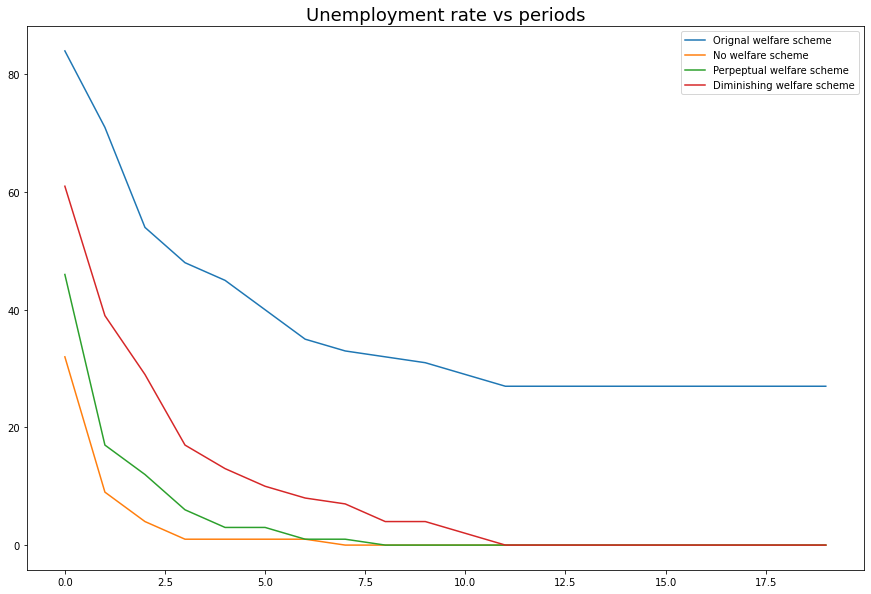

In [ ]:
df=pd.DataFrame(job_data).T
df.columns = ['Orignal welfare scheme', 'No welfare scheme', 'Perpeptual welfare scheme', 'Diminishing welfare scheme']
df.plot(figsize = (15,10));
plt.title('Unemployment rate vs periods', size = 18);

### **Analysis of Results**
- In the vanilla scheme (blue), we see that the number of unemployed people decreases slowly till about 30 and then plateaus, showing that this scheme does not eliminate unemployment in the long run, as some rational agents choose to maximize their savings by staying under the welfare programme.

- The other three schemes achieve the goal of eliminating unemployment.

- Within those three schemes, the one in which no welfare was provided (yellow) results in the steepest reduction of uneployment as the agents are forced to work for their survival as the desperation value is high.

- The perpetual welfare scheme is faster than the dminishing aid scheme in eradicating uneployment as the benefit of finding a job is greater to the agents.

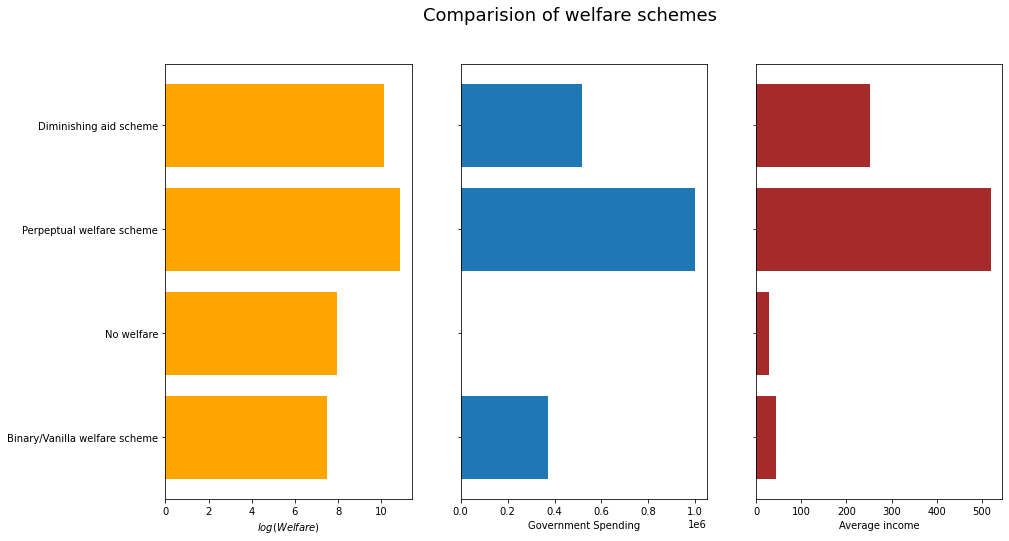

In [ ]:
fig, axs = plt.subplots(1,3, sharey = True, figsize = (15,8))
axs[0].barh(y =  ['Binary/Vanilla welfare scheme', 'No welfare', 'Perpeptual welfare scheme', 'Diminishing aid scheme'],width= numpy.log(welfare), color='orange')
axs[0].set_xlabel('$log(Welfare)$')
axs[1].barh(y =  ['Binary/Vanilla welfare scheme', 'No welfare', 'Perpeptual welfare scheme', 'Diminishing aid scheme'],width= spending)
axs[1].set_xlabel('Government Spending')
axs[2].barh(y =  ['Binary/Vanilla welfare scheme', 'No welfare', 'Perpeptual welfare scheme', 'Diminishing aid scheme'],width= avg_income, color='brown')
axs[2].set_xlabel('Average income')
plt.suptitle('Comparision of welfare schemes', size = 18);




# plt.figure(figsize = (11,8))
# plt.barh(y =  ['Orignal welfare scheme', 'No welfare scheme', 'Perpeptual welfare scheme', 'Diminishing welfare scheme'],width= numpy.log(welfare));
# plt.show()
# plt.figure(figsize = (11,8))
# plt.barh(y =  ['Orignal welfare scheme', 'No welfare scheme', 'Perpeptual welfare scheme', 'Diminishing welfare scheme'],width= spending)
# plt.show()
# plt.figure(figsize = (11,8))
# plt.barh(y =  ['Orignal welfare scheme', 'No welfare scheme', 'Perpeptual welfare scheme', 'Diminishing welfare scheme'],width= avg_income)


###  **Results**
- It can be seen that doing nothing (no welfare) creates greater welfare than the vanilla scheme without any government spending. As a result, having no welfare scheme might look like a good option but it fails as it makes the agents vulnerable to exploitation as they are desperate for jobs. Addiotnally, the governemnt would still like to take some initiative to increase welfare.
- The perpetual welfare scheme results in maximum welfare albeit the government has to spend a lot of money.
- The best scheme out of these is the one with diminshing aid. It achieves welfare close to the welfare scheme at about half the government expenditure.

In [ ]:
df = df1.copy()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df[1:]
df.index = ['Binary/Vanilla', 'No Welfare', 'Perpeptual Welfare', 'Diminishing Aid']
df

,Government spending,Number of employed agents,Social welfare,Average Periodic Earning
Binary/Vanilla,372500.000000,73.0,1789.0,43.0
No Welfare,0.000000,100.0,2900.0,29.0
Perpeptual Welfare,1000000.000000,100.0,51900.0,519.0
Diminishing Aid,518971.690819,100.0,25200.0,252.0


### **MNREGA** (Mahatma Gandhi National Rural Employment Guarantee Act 2005)
In the models described above, we were assuming that the government only provides monetary aid. But since the goal of welfare schemes is to minimize unemployment while maximizing welfare, they can directly provide access to jobs, which is what MNREGA does.  

This welfare scheme was launched in 2005 by the government of India which guarantee’s every person a “right to work”.

Under this scheme, one person from every household is entitled to 100 days of livelihood per financial year. If work isn’t provided in 15 days, then the government will have to compensate the individual until they are employed.

The advantages of MNREGA are the following:

- As there is no initial monetary aid, the scheme coerces agents to be employed, but makes the process of finding a job easy. This achieves the goal of reducing poverty and unemployment, and at the same time, increasing social output.

- The employment involves unskilled labour, and the work can be shared among members of a household, so the burden is not on one member to earn bread.

- In our models, the government could only control desperation through welfare schemes but now the government can also control preferences of the agents as they simplified the process of job-seeking.


### Additional work that can be taken up based on this project
- Comparing the short-term and long-term effectiveness of schemes by plotting welfare with respect to time (periods). This can be helpful in making decisions about welfare scheme-related policy based on whether better results are needed in the short-term or the long-run. For example, the [Universal Basic Income scheme was implemented in a Namibian village](https://www.spiegel.de/international/world/a-new-approach-to-aid-how-a-basic-income-program-saved-a-namibian-village-a-642310.html) for a year from 2008 to 2009, leading to flourishment at a great scale, i.e., the short-term impact of the scheme was great.
- The model can be improved by adding time-dependent parameters for inflation and changing expenses introduced by improved lifestyle because of increase in salary over the periods.
- MNREGA can be modelled as employment for a fraction of each period and studied in comparison to these schemes.
- A sudden lack of jobs might be introduced randomly during simulation to imitate the situation during economic crises and their impact on such schemes can be studied in terms of welfare with respect to time.

####**References**
- [TED-Ed: Why is it so hard to escape poverty? - Ann-Helén Bay](https://youtu.be/D9N7QaIOkG8)
- Sumner, Andy, 'The Poverty Paradox: Why are some people still poor?', Global Poverty: Deprivation, Distribution, and Development Since the Cold War (Oxford, 2016; online edn, Oxford Academic, 18 Aug. 2016), https://doi.org/10.1093/acprof:oso/9780198703525.003.0005
- Scott, Dana & Finamor, Lucas, 2020. "Employment Effects of Unemployment Insurance Generosity During the Pandemic," MPRA Paper 102390, University Library of Munich, Germany.
- [Spiegel International: How a Basic Income Program Saved a Namibian Village](https://www.spiegel.de/international/world/a-new-approach-to-aid-how-a-basic-income-program-saved-a-namibian-village-a-642310.html)
- [Wikipedia: Unemployment Benefits](https://en.wikipedia.org/wiki/Unemployment_benefits)
- [Wikipedia: Universal Basic Income](https://en.wikipedia.org/wiki/Universal_basic_income#cite_note-72)
- [Wikipedia: National Rural Employment Guarantee Act, 2005](https://en.wikipedia.org/wiki/National_Rural_Employment_Guarantee_Act,_2005)
- Matplotlib Documentation
- Pandas Documentation
- Class Resources of HS4007: Computational Economics and Public Policy

### Contribution Report
- Siddharth Betala (BE19B032): Ideation and formulation of the problem statement, programming the entire model (all 4 schemes and determining p[arameters for comparing the schemes) and tabulation functions, extensive literature survey, preparing and giving the presentation, contributed to preparing the mid-term report, and preparing the final report with all observations and results.
- Bharath S (AE19B009): Code for plotting, and visualization functions, helped in determining and defining the parameters used for comparing the schemes,contributed in presentation, and prepared the mid-term report.
- Mishma (ED19B009): Literature Survey on MNREGA and other topics
